1. perform facet grid of histograms and/or scatterplots, or...

# Data Analysis on bank loans from Prosper
## by Aaron Remski

> This dataset contains ~114,000 records containing data on bank loans from 2005-2014. It includes 81 variables ranging from the borrower's credit grade to their stated monthly income.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows', 150) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format # set it to convert scientific notation such 
# as 4.22510e+11 to 42251000462321.00

In [2]:
############################################################################
## (Un)Comment out if using a lighter background style in Jupyter
plt.style.use("dark_background")

In [3]:
# load data into pandas dataframe!
loanDF = pd.read_csv("prosperLoanData.csv")

## Dataset Overview


In [4]:
# width & height
loanDF.shape

(113937, 81)

In [5]:
# review loanDF variables & identify features that require additional tidying/cleaning
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# see sample of data
loanDF.sample(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
90402,A6F63422764760662092A85,349822,2008-06-13 00:28:44.203000000,C,36,Chargedoff,2009-09-24 00:00:00,0.1818,0.1600,0.1500,NaN,NaN,NaN,NaN,NaN,NaN,2,FL,Waiter/Waitress,Full-time,14.0000,True,False,NaN,2008-05-18 11:39:03.907000000,640.0000,659.0000,2006-05-04 00:00:00,4.0000,4.0000,6.0000,2,36.0000,4.0000,12.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1287.0000,0.9100,157.0000,4.0000,1.0000,0.0000,0.2800,"$1-24,999",True,1600.0000,DA713423681789055EC615C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752,15.0000,69,33214,3000,2008-06-23 00:00:00,Q2 2008,CB303420126248989FCFDF5,105.4700,1009.7000,620.6800,389.0200,-23.3800,0.0000,2379.3200,2379.3200,0.0000,1.0000,0,0,0.0000,70
50931,A6133389813868276DA22DD,141167,2007-05-22 02:04:43.850000000,D,36,Completed,2010-06-11 00:00:00,0.1639,0.1567,0.1417,NaN,NaN,NaN,NaN,NaN,NaN,0,FL,Military Enlisted,Full-time,23.0000,False,True,FEF83377364176536637E50,2007-05-12 11:02:00.700000000,620.0000,639.0000,2000-03-28 00:00:00,16.0000,11.0000,31.0000,9,147.0000,1.0000,5.0000,0.0000,0.0000,12.0000,0.0000,0.0000,3843.0000,0.3100,3086.0000,19.0000,0.7800,2.0000,0.3200,"$25,000-49,999",True,2480.0833,4D5C3391498388605449A74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,82,15478,5000,2007-05-30 00:00:00,Q2 2007,8E4433885742015664B98E5,174.9700,6262.3300,5000.0300,1262.3000,-83.2200,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,71
65253,BB363562215649732EFD56E,670883,2012-11-15 22:11:46.103000000,NaN,36,Current,NaN,0.3580,0.3177,0.3077,0.2799,0.1675,0.1124,1.0000,HR,5.0000,1,NJ,Sales - Retail,Employed,87.0000,False,False,NaN,2012-11-15 22:11:44,660.0000,679.0000,2005-01-17 00:00:00,8.0000,8.0000,9.0000,6,262.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9052.0000,0.8400,1409.0000,9.0000,1.0000,0.0000,0.3000,"$1-24,999",True,1833.3333,0458366938700551956A084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,15,78970,3937,2012-12-07 00:00:00,Q4 2012,D9F835628391585179BFBCA,170.9800,2393.7200,1110.9500,1282.7700,-40.3700,0.0000,0.0000,0.0000,0.0000,0.9842,0,0,0.0000,63
4002,673235614434308982AB3AE,657522,2012-10-20 20:34:47.560000000,NaN,36,Current,NaN,0.3404,0.3006,0.2906,0.2643,0.1475,0.1168,2.0000,E,5.0000,1,CA,Clerical,Employed,26.0000,False,False,NaN,2012-10-20 20:34:46,720.0000,739.0000,2008-05-08 00:00:00,4.0000,4.0000,6.0000,3,32.0000,2.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,231.0000,0.0900,2319.0000,6.0000,1.0000,2.0000,0.2900,"$1-24,999",T

## Structure of Dataset summarized
* ~114,000 records with 81 characteritics on completed, defaulted, current, & other types of bank loans. <br>
### Noteable Features
IncomeRange, CreditGrade, Term, LoanStatus, CloseDate, BorowerAPR, BorrowerRate,  LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, ExmploymentStatus, ExmploymentStatusDuration, ListingNumber, ListingCreationDate, 

### Assessing Dataset

* Roughly 20 features can be removed to make it easier to manage the data <br>
* 4 (features)variables express dates, e.g. ListingCreationDate, ClosedDate, DateCreditPulled, LoanOriginationDate. Convert to datetime type<br>
* Several (variables)columns types need to be converted, e.g. CreditGrade, ProsperRating (Alpha), IncomeRange to ordered categorical type<br>


In [7]:
##################### DELETE THIS CELL? ########################################################
# Columns to keep
keep = ['ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','CloseDate','BorrowerAPR','BorrowerRate',
    'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
    'ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','ExmploymentStatus','ExmploymentStatusDuration']

In [8]:
# Columns to remove
remove = ['ListingKey', 'TotalTrades','TradesNeverDelinquent (percentage)', 'LoanKey','TotalProsperLoans','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPrincipalBorrowed',
          'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination',
          'LoanNumber','MemberKey']

## Data Cleaning

### Remove features that have too much data missing, provide no meaningful purpose, or validity in the present analysis.

In [9]:
# remove columns defined in 'remove' list to work with a roughly smaller dataframe
# show/verify remaining columns after removal

loanDF = loanDF.drop(remove, axis=1)
loanDF.columns

Index(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCre

### Convert alpha columns into ordered categories

In [10]:
# This is where the ordinal_categories will be defined & converted
# convert CreditGrade, ProsperRating (Alpha), & IncomeRange to ordinal categorical types
# CreditGrade, & ProsperRating (Alpha): order assumed

ordinal_dict = {'CreditGrade': ['AA','A','B','C','D','E','HR'],
                    'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR'],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999',
                                   '$1-24,999','0','Not employed','Not displayed']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_dict[var])
    loanDF[var] = loanDF[var].astype(ordered_var)    

In [11]:
# confirm ordered categorical datatype converted
loanDF.CreditGrade.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

In [12]:
# confirm IncomeRange dtype converted
loanDF.IncomeRange.dtype

CategoricalDtype(categories=['$100,000+', '$75,000-99,999', '$50,000-74,999',
                  '$25,000-49,999', '$1-24,999', '0', 'Not employed',
                  'Not displayed'],
, ordered=True)

### Datatime type updates

In [13]:
# Convert type of date fields to datetime64[ns]

datecols = ['ListingCreationDate','ClosedDate','DateCreditPulled','LoanOriginationDate']

for datecol in datecols:
    loanDF[datecol] = pd.to_datetime(loanDF[datecol])

In [14]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

In [15]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

*If LoanOriginationQuarter is used for analysis it will need cleaning. For example "Q3 2015" should be "Q3", 3 or similar. The year should be removed as it's labelled in the LoanOriginationDATE, therefore, redundant.*

In [26]:
# get timeframe of loans
print("LoanOriginationDate: \n")
print(f"Earliest Loan Origination Date: {loanDF.LoanOriginationDate.min()}")
print(f"Latest Loan Origination Date: {loanDF.LoanOriginationDate.max()}\n\n")

print("ClosedDateDate: \n")
print(f"Earliest Closed Date: {loanDF.ListingCreationDate.min()}")
print(f"Latest Closed Date: {loanDF.ListingCreationDate.max()}\n\n")

print("ClosedDateDate: \n")
print(f"Earliest Closed Date: {loanDF.ClosedDate.min()}")
print(f"Latest Closed Date: {loanDF.ClosedDate.max()}\n\n")


Earliest Loan Origination Date: 2005-11-15 00:00:00
Latest Loan Origination Date: 2014-03-12 00:00:00


In [16]:
# pull year out This would normally be delt with let's see if we want to use it.
# 'LoanOriginationQuarter'

# This analysis will explore:
1. What are some common characteristics of 'successful' (completed) vs 'failed' (defaulted & chargedoff) loans?
2. Are there any surprising characteristics of 'successful' loans?
3. Do some of the expected/obvious value relationships check out? 
    a. higher creditscores correlate with lower interest rates
    b. high credit scores have higher rate of completion(repayment)
    c. low debt to income ratio correlates to higher IncomeRange

4. What are common characteristics of borrowers who have high interest rate, or default, or certain occupation?

## Features in the dataset that will help support the investigation
1. LoanStatus, 

### END of Data Wrangling
# 
### START of Analysis

## Demographics

In [17]:
loanDF.groupby('BorrowerState')['StatedMonthlyIncome'].mean().sort_values()

BorrowerState
ND   3280.0176
ME   3635.3201
IA   3714.3970
ID   4182.1052
MT   4235.0467
SD   4323.2474
MO   4710.8768
UT   4747.7601
AL   4759.9057
NE   4796.5701
VT   4817.7391
AR   4851.8905
MN   4912.8956
WI   4920.9123
MS   4923.6269
KY   4929.3883
OK   4931.0186
MI   4932.1911
OH   4964.9273
WV   4971.7393
TN   5051.2118
IN   5094.8761
KS   5148.6777
SC   5230.9363
LA   5274.8769
WY   5300.4783
AZ   5347.0317
WA   5379.5497
FL   5399.2163
PA   5415.8423
NC   5425.2826
GA   5460.7836
RI   5533.7772
NM   5545.5960
NV   5589.2041
IL   5590.8203
CO   5647.5356
OR   5662.2855
DE   5754.2633
NH   5855.3560
AK   5880.6175
TX   6134.4729
CA   6184.8292
MA   6190.1895
HI   6221.8798
NY   6225.8809
VA   6508.5743
MD   6516.0321
NJ   6807.0200
DC   6822.2520
CT   7394.6969
Name: StatedMonthlyIncome, dtype: float64

In [18]:
# Review IncomeRange for all loans - numerically
loanDF['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
0                     0
Name: IncomeRange, dtype: int64

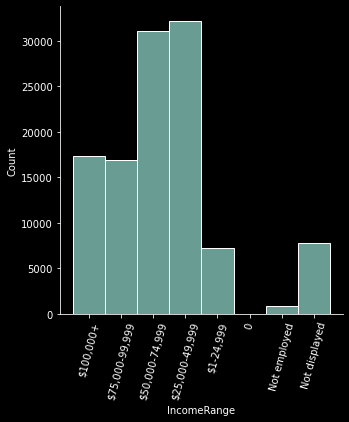

In [19]:
# see distribution of data on IncomeRange
sb.displot(data=loanDF, x='IncomeRange')
plt.xticks(rotation=75);

## Histogram Analysis - IncomeRange
* Roughly the same number of loans represented for IncomeRange 100k+ and 75k-100k, 17k records
* Roughly the same number of loans represented for IncomeRange 50k-75k and 25k-50k, 32k records
* Additional visuals will be using IncomeRange below


In [20]:
loanDF['StatedMonthlyIncome'].value_counts()

4166.6667     3526
5000.0000     3389
3333.3333     2917
3750.0000     2428
5416.6667     2374
              ... 
7069.9167        1
4266.3333        1
2211.7500        1
7032.9167        1
18756.0000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

In [21]:
loanDF['StatedMonthlyIncome'].describe()

count    113937.0000
mean       5608.0256
std        7478.4973
min           0.0000
25%        3200.3333
50%        4666.6667
75%        6825.0000
max     1750002.9167
Name: StatedMonthlyIncome, dtype: float64

In [22]:
# HOw many records represent person's claiming to earn $40,000/month+
loanDF[loanDF.StatedMonthlyIncome >= 40000]['ListingNumber'].count()

154

Text(0.5, 0, 'Stated Monthly Income')

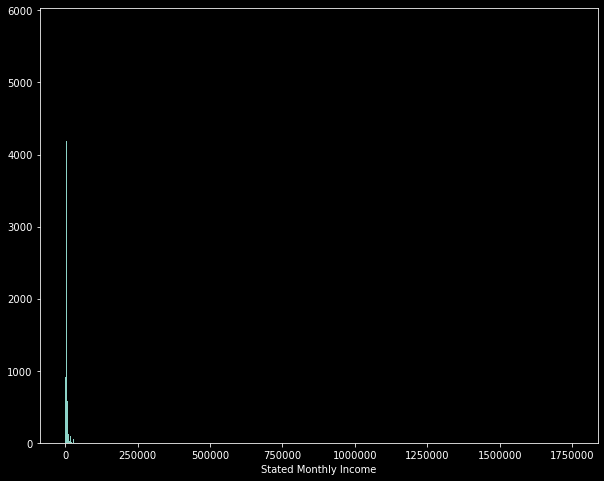

In [23]:
bins = np.arange(min(loanDF['StatedMonthlyIncome']), max(loanDF['StatedMonthlyIncome']), 10000)
plt.figure(figsize=[10,8])

plt.ticklabel_format(axis='both', style='plain')
plt.hist(data=loanDF, x='StatedMonthlyIncome', bins=10000)
#plt.xlim([0,60000])
plt.xlabel('Stated Monthly Income')

## Histogram Analysis - StatedMonthlyIncome
* The histogram of 'StatedMonthlyIncome' has some significant outliers. This analysis will focus on bank loans by individuals with limited incomes <= $30,000/month = $390,000/yr

In [24]:
high_outliersTF = (loanDF['StatedMonthlyIncome'] > 30000)
print(high_outliers.sum())
high_outliers = loanDF.loc[high_outliersTF,:]
high_outliers.Occupation.value_counts()

NameError: name 'high_outliers' is not defined

In [ ]:
bins = np.arange(min(loanDF['StatedMonthlyIncome']), max(loanDF['StatedMonthlyIncome']), 10000)
plt.figure(figsize=[10,8])

plt.ticklabel_format(axis='both', style='plain')
plt.hist(data=loanDF, x='StatedMonthlyIncome', bins=10000)
plt.xlim([0,35000])
plt.xlabel('Stated Monthly Income')

In [ ]:
sb.displot(data=loanDF, x="DebtToIncomeRatio")
plt.xlim([0,1.25])

In [ ]:
loanDF['ProsperRating (Alpha)'].value_counts()

In [ ]:
sb.displot(data=loanDF, x='ProsperRating (Alpha)');

## Histogram Analysis - ProsperRating (Alpha)

* Follows a normal distribution curve where 'C' represents the median (roughly)


In [ ]:
# reveal number of records according to their LoanStatus
loanDF.LoanStatus.value_counts()

In [ ]:
# Visualize LoanStatus distribution

fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
ax.tick_params(axis='x', rotation=60)
sb.countplot(data=loanDF, x='LoanStatus', color=sb.color_palette()[3], order=loanDF.LoanStatus.value_counts().index);

## Countplot analysis - LoanStatus
> As expected the majority of the bank loans are either current(good standing) or completed. However there is a healthy no. of ChargedOffs & Defaulted loans.<br/>
> I would like further analysis of ChargedOff & Defaulted 

In [ ]:
loanDF3 = loanDF.copy()

In [ ]:
# THIS IS NOT WORKING AS INTENTED
#loanDF3.drop(loanDF3.query('LoanStatus == "Completed" and LoanStatus == "Current"').index, inplace=True)
#loanDF3.sample(15)

In [ ]:
''' Columns with small amount of data
EstimatedEffectiveYield
EstimatedLoss          
EstimatedReturn        
ProsperRating (numeric)
ProsperRating (Alpha)  
ProsperScore           
'''

In [ ]:
plt.figure(figsize=[15,8])
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
plt.subplot(1,2,1)
#plt.set_title("All loans")
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=30, color=sb.color_palette()[2]);

plt.subplot(1,2,2)
#plt.set_title("Loans <= $5000")
plt.xlabel('Loan Amount (zoom to <$10,000)')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=90, color=sb.color_palette()[3]);
plt.xlim(0,10000);


## Histogram analysis - LoanAmount
* `$`4000 loan is the most prevalent loan amount. Additionally, loan amounts fall in `$`5,000 increments with the highest loans no greater than `$`35,000<br>
* There is a right-skew.<br>
* Nearly half of all Prosper loans are < $5000. What distinguishes these loans from the others?
* Investigate the `$`4000 loans<br>


In [ ]:
Completed = loanDF.loc[loanDF['LoanStatus'] == 'Completed']
Current =  loanDF.loc[loanDF['LoanStatus'] == 'Current']
completed_current = pd.concat([Completed, Current])
completed_current.sample(5)

In [ ]:
# Get all bad loans into new DF
Defaulted = loanDF.loc[loanDF['LoanStatus'] == 'Defaulted']
Chargedoff =  loanDF.loc[loanDF['LoanStatus'] == 'Chargedoff']
defaulted_chargedoff = pd.concat([Defaulted, Chargedoff])
defaulted_chargedoff.sample(3)

In [ ]:
defaulted_chargedoff.LoanOriginalAmount.sum()

#### $110,000,000 in bad loans. 

In [ ]:
(110000000 / 950000000) * 100

#### 11.6% of the bank loans represented in this dataset are defaulted or chargedoff.

In [ ]:
# Quick look at the distribution between 'defaulted' & 'Chargedoff' loans in new DF
ax = plt.figure(figsize=[10,8])
#ax.set_title('Defaulted vs. Chargedoff Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count')
#ax.set_title('BLABLABLA')
graph = sb.countplot(data=defaulted_chargedoff, x='LoanStatus', color=sb.color_palette()[4])
graph.set_title("Defaulted Loan count vs. Chargedoff Loans")

In [ ]:


print(f"Total # of Completed Loans: {Completed.ListingNumber.count()}\nCompleted Loans mean interest rate: {Completed.BorrowerRate.mean()}")
print(f"Total # of Failed Loans: {defaulted_chargedoff.ListingNumber.count()}\nFailed Loans mean interest rate: {defaulted_chargedoff.BorrowerRate.mean()}")


In [ ]:
high_interest = loanDF['BorrowerRate'] > 0.25
print(high_interest.sum())
high_interest_rate = loanDF.loc[loanDF['BorrowerRate'] > 0.25]
#high_interest_rate.sum()
                            

In [ ]:
# Compare BorrowerRate's between the Completed loans & the Defaulted & ChargedOff
# would like to stack these but I don't want to single out the "completed" & "failed"
fig, ax = plt.subplots(1,2, figsize = (20,10))
fig.suptitle("Compare BorrowerRates for Completed Loans vs. Failed Loans")

style = dict(size=16, color='black', backgroundcolor=sb.color_palette()[4])

completed_mean = "Mean BorrowerRate:\n" + str(round(Completed.BorrowerRate.mean(),3))

ax[0].set_title("Completed Loans BorrowerRates")
ax[0].text(0.3,3305,completed_mean, **style)
#ax[1].annotate(str(Completed.BorrowerRate.mean()),(0.05,3250))
sb.histplot(data=Completed, x='BorrowerRate', bins=30, color=sb.color_palette()[2], ax=ax[0]);

failed_mean = "Mean BorrowerRate:\n" + str(round(defaulted_chargedoff.BorrowerRate.mean(),3))

ax[1].set_title("Failed Loans BorrowerRates")
ax[1].text(0,1600,failed_mean, **style)
#plt.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='white')
boxf = sb.histplot(data=defaulted_chargedoff, x='BorrowerRate', bins=30, color=sb.color_palette()[1], ax=ax[1]);

## Bivariate - BorrowRate & LoanStatus
## Histogram Analysis - BorrowerRate
Comparing the BorrowerRate distribution (& mean) for Failed Loans vs. Completed Loans. 

* There are double the number of completed loans to the number of failed loans. This is a much higher ratio than I would have guessed.
* As one might expect, the completed loans interest rates are lower vs. the failed loans
* There was nothing surprising that came from this visualization


In [ ]:
Completed.ListingNumber.count()

In [ ]:
defaulted_chargedoff.ListingNumber.count()

In [ ]:
# get all records that match the query
past3160 = loanDF.query("LoanStatus == 'Past Due (31-60 days)'")
past6190 = loanDF.query("LoanStatus == 'Past Due (61-90 days)'")
past91120 = loanDF.loc[loanDF.LoanStatus == 'Past Due (91-120 days)']
past120 = loanDF.query("LoanStatus == 'Past Due (>120 days)'")

defaulted = loanDF.query("LoanStatus == 'Defaulted'")

all_past = pd.concat([past3160, past6190, past91120, past120])


In [ ]:
all_past.sample(3)

In [ ]:
all_past.LoanOriginalAmount.sum()

#### $8,000,000 in Past Due loans

In [ ]:
# plot distribution of LoanStatus where loanstatus == past due

plt.hist(data=all_past, x='LoanStatus')
plt.xticks(rotation=65)

## Histogram Analysis - Past Due

* There are roughly 1000 loans that are in a "past due" LoanStatus totalling $8,000,000 in loans
* There are no "CreditGrade" values for all entries with "past due" in LoanStatus


In [ ]:
loanDF.CreditGrade.value_counts()

In [ ]:
sb.displot(data=loanDF, x="CreditGrade")

## Histogram Analysis - Credit Grade

* Plotting a histogram of the CreditGrades indicates a normal distribution of CreditGrades across the spectrum of grades. 

In [ ]:
loanDF3.query("LoanOriginalAmount <= 5000")['LoanOriginalAmount'].describe()

In [ ]:
# loans5000.CreditGrade.value_counts()
loanDF3.query("LoanOriginalAmount <= 5000")['CreditGrade'].value_counts()

In [ ]:
#sb.displot(data=loans5000, x='CreditGrade')
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)

#plt.xlabel('CreditGrade for Loans <= $5000')
graph2 = sb.countplot(data=(loanDF3.query("LoanOriginalAmount <= 5000")), x='CreditGrade', color=sb.color_palette()[4])
graph2.set(title="Credit Grades for Loans <= $5000")
plt.xlabel("Credit Grade")
plt.ylim(0,4000)

plt.subplot(1,2,2)
#plt.xtitle('CreditGrade for Loans <= $5000')
graph = sb.countplot(data=(loanDF3.query("LoanOriginalAmount > 5000")), x='CreditGrade',  color=sb.color_palette()[5]);
graph.set(title="Credit Grades for Loans > $5000")
plt.xlabel("Credit Grade")
#sb.displot(data=loans5000, x='CreditGrade');
plt.ylim(0,4000);

#graph.set_title("Credit Grade Distribution\n Loans > 5000 & Loans <= 5000")

## Bivariate Analysis
### What is the CreditGrade distribution for loans less than 5000 and for loans greater than 5000
* 45% of the loans are <= $5000 where the borrowers CreditGrade is predominately C or below!
* The creditgrades for loans <= 5000 are considerably lower than those that are > 5000<br>

In [ ]:
loanDF3.LoanOriginalAmount.sum()

#### $950,000,000 ALL loans summation

In [ ]:
# Total the Loan Original Amount for all Completed & Current loans 
completed_current['LoanOriginalAmount'].sum()

#### $820,000,000 Current or Completed loans summation

In [ ]:
loanDF.groupby('CreditGrade')['LoanOriginalAmount'].mean()

In [ ]:

sb.displot(data=loanDF, x='LoanOriginalAmount', col="CreditGrade", height=7, aspect=.75, col_wrap=3)

#axes = axes.flatten()
#print(axes)

## Faceted Histogram Analysis

* One can see that loans for people with CreditGrades that are low, are restricted to loans with smaller amounts
* One can see that loans for people with CreditGrades that are high, have a more evenly distributed LoanAmount range. As the CreditGrade decreases from 'AA' to 'E', one can see that the number of 25000 loans decreases with each credit grade decrease

# Bivariate Exploration 
## Defaulted & Chargedoff Loan relationships
#### For all past due accounts, what is the homeownership?

In [ ]:
defaulted_chargedoff.IsBorrowerHomeowner.value_counts()

In [ ]:
#sb.displot(data=defaulted_chargedoff, x='IsBorrowerHomeowner', 

In [ ]:
all_past.IsBorrowerHomeowner.value_counts()

In [ ]:
#sb.regplot(data=defaulted_chargedoff, x=LoanOriginalAmount

In [ ]:
g = sb.FacetGrid(loanDF, col="CreditGrade")
#g.map(sb.hist
 #     
  #    plot, "LoanOriginalAmount")

In [ ]:
# all past due loans, what are the homeownership stats?
homeowner = all_past.IsBorrowerHomeowner.value_counts().to_frame()

In [ ]:
#sb.countplot(all_past.IsBorrowerHomeowner.value_counts().to_frame())

In [ ]:
completed = loanDF.query("LoanStatus == 'Completed'")
completed.shape

In [ ]:
# What does homeownership look like for loans that have been completed
completed.IsBorrowerHomeowner.value_counts()

In [ ]:
all_past.CreditScoreRangeLower.value_counts()

In [ ]:
all_past.CreditScoreRangeUpper.value_counts()

**LoanStatus** could be interesting to investigate further. For example, let's look at all "Past Due..." & look at various vars from there. **IncomeRange**, **CreditGrade**, **Occupation**

In [ ]:
# view count of values
all_past.IncomeRange.value_counts()

In [ ]:
# view count of values
all_past.BorrowerRate.value_counts()

In [ ]:
# view count of values
print(all_past.CurrentDelinquencies.value_counts())
# This plot doesn't work
#sb.displot(all_past.CurrentDelinquencies.value_counts())

In [ ]:
loanDF.IncomeRange.value_counts()

**IncomeRange** -- another interesting variable to compare with others. I'm particularly interested in the $100,000+ bracket.

In [ ]:
# explore breakdown of Monthly Incomes
pd.set_option('display.float_format', str)
loanDF['StatedMonthlyIncome'] = loanDF['StatedMonthlyIncome'].astype(np.int64)
loanDF['StatedMonthlyIncome'].describe()

In [ ]:
loanDF.Occupation.value_counts().head(100)

### What characteristics correlate with lower interest rate for loans?

In [ ]:
pd.__version__

In [ ]:
# Show mean BorrowerRate by State
BorrowerRatebyState = loanDF.groupby('BorrowerState')['BorrowerRate'].mean().sort_values()
print(f"Top 5 states with lowest average interest rate: \n {BorrowerRatebyState.head(5)}")
print(f"Top 5 states with **highest** interest rate: \n{BorrowerRatebyState.tail(5)}")

In [ ]:
# Show mean Debt-to-Income-Ratio by State
DebtRatiobyState = loanDF.groupby('BorrowerState')['DebtToIncomeRatio'].mean().sort_values()
print(f"Top 5 states with lowest debt to income ratio: \n {DebtRatiobyState.head(5)}")
print(f"Top 5 states with **highest** deb to income ratio: \n{DebtRatiobyState.tail(5)}")

In [ ]:
# get top 15 occupations with highest Stated monthly incomes
occupation_income = loanDF.groupby('Occupation')['StatedMonthlyIncome'].mean().sort_values(ascending=False)
occupation_income.head(15)

In [ ]:
# lowest stated monthly incomes by occupation
occupation_income.tail(15)

In [ ]:
# create dictionary to translate "Listing Category (numerical)"
listingcategory_dict = {
    0:'Not Available',
    1:'Debt Consolidation',
    2:'Home Improvement',
    3:'Business',
    4:'Personal Loan',
    5:'Student Use',
    6:'Auto',
    7:'Other',
    8:'Baby & Adoption',
    9:'Boat',
    10:'Cosmetic Procedure',
    11:'Engagement Ring',
    12:'Green Loans',
    13:'Household Expenses',
    14:'Large Purchases',
    15:'Medical/Dental',
    16:'Motorcycle',
    17:'RV',
    18:'Taxes',
    19:'Vacation',
    20:'Wedding Loans'
}

In [ ]:
# test dictionary
listingcategory_dict[10]

In [ ]:
# How many loans are there of each ListingCategory
listcat_loans = loanDF['ListingCategory (numeric)'].value_counts().sort_values().tail(10)
print(f"Top 10 Listing Categories \n{listcat_loans}")
print(f"\nTotal # of loans represented by the top 10: {listcat_loans.sum()}")

In [ ]:
# Convert Series 'listcat' to dataframe using to_frame()
listcat = listcat_loans.to_frame()
listcat

In [ ]:
listcat.name = 'ListingCategory'

In [ ]:
listcat['Listing Category'] = listcat.index
listcat

In [ ]:
# delete
for i in enumerate(listcat_loans.index):
    print(i)

In [ ]:
# delete
for i in listcat_loans.index:
    print(i)

In [ ]:
listingcategory_dict

In [ ]:
#listcat.columns = ['count','category']
listcat

In [ ]:
#listcat.drop('Category', inplace=True)

In [ ]:
listcat_dict = listingcategory_dict.copy()

In [ ]:
listcat_dict

In [ ]:
#index = 3
#print(f"listcat_loans: {listcat_loans.}")

'''for i in len(listcat):
    listcat['category'] = listingcategory_dict[listcat[i]]
        
#print(f"listcat_loans.loc[index]: {listcat_loans.loc[index]}")
listcat_loans'''

In [ ]:
#listcat_loans['Category'] = listingcategory_dict[listcat_loans.loc[index]
listcat

#### 1-Debt Consolidation @ 58308, 0-Not Avail., 7-other, 2-Home Improvement @ 7433, 3-Business @ 7189, 6-Auto @ 2572 

The category of the listing that the borrower selected when posting their listing: <br/><br/>
*0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement,* <br/>
*3 - Business, 4 - Personal Loan*, 5 - Student Use, <br/>
*6 - Auto, 7- Other*, 8 - Baby&Adoption, 9 - Boat, <br/>
10 - Cosmetic Procedure, 11 - Engagement Ring, <br/>
12 - Green Loans, *13 - Household Expenses*, 14 - Large Purchases, <br/>
*15 - Medical/Dental*, 16 - Motorcycle, 17 - RV, <br/>
*18 - Taxes*, 19 - Vacation, 20 - Wedding Loans <br/>

### What is the structure of your dataset?

> The Prosper Loan Data set is 113937 records with 81 variable/columns. Loan data includes everything from loan type, to BorrowerRate

### What is/are the main feature(s) of interest in your dataset?

> Greatest interest so far: loan amount, interest rate, term. The items that make the loan most attractive and least attractive on the opposite side of the spectrum  . Any other trends that are peculiar, etc.

> Explore characteristics of all past due accounts

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ListingCategory, IncomeRange, CreditGrade, Occupation, StatedMonthlyIncome, 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [ ]:
# Univarite exploration of BorrowerAPR
sb.displot(loanDF['BorrowerAPR']);

In [ ]:
# What is going on with the interest rate around 0.36? Why are there so many loans with this percentage
borrAPR36 = loanDF.query('BorrowerAPR > 0.36 and BorrowerAPR < 0.37')
borrAPR36.shape

In [ ]:
borrAPR36.sample(10)

Some observations (not interesting):
1. The personal loan people had the lowest average credit score, students loans next
2. The RV loan types had the highest average credit score. This infers that people who have the ability to buy RVs are in better financial situations.

### What is going on with the BorrowerAPR/Rate at 31-33% & 36-37%, well over 5000 records? Let's investigate additional info about these records

In [ ]:
sb.displot(loanDF['BorrowerRate']);

In [ ]:
# explore the spike in BorrowerRate around 0.3
BorrRate30 = loanDF.query("BorrowerRate <= 0.33 and BorrowerRate >= 0.30")
BorrRate30.shape

In [ ]:
BorrRate30.Occupation.value_counts().head(20)

In [ ]:
sb.displot(BorrRate30['Term']);

Loan Terms = some 12 month, majority are 36 mnth loans, but healthy percentage at 60 mnth (5 year loan)

In [ ]:
base_color = sb.color_palette()[5]
sb.displot(data = BorrRate30, x = 'LoanOriginalAmount', color = base_color);


In [ ]:
# Use Seaborn's CountPlot as an alternative to compare with plt.hist & seaborn's distplot

base_color = sb.color_palette()[2]
sb.countplot(data = loanDF, x = 'ListingCategory (numeric)', color = base_color);

The category of the listing that the borrower selected when posting their listing: <br/>
    0 - Not Available, <br/>
    1 - Debt Consolidation, <br/>
    2 - Home Improvement, <br/>
    3 - Business, <br/>
    4 - Personal Loan, <br/>
    5 - Student Use, <br/>
    6 - Auto, <br/>
    7- Other, <br/>
    8 - Baby&Adoption, <br/>
    9 - Boat, <br/>
    10 - Cosmetic Procedure, <br/>
    11 - Engagement Ring, <br/>
    12 - Green Loans, <br/>
    13 - Household Expenses, <br/>
    14 - Large Purchases, <br/>
    15 - Medical/Dental, <br/>
    16 - Motorcycle, <br/>
    17 - RV, <br/>
    18 - Taxes, <br/>
    19 - Vacation, <br/>
    20 - Wedding Loans <br/>


In [ ]:
# plot the distribution of LoanAmounts
base_color = sb.color_palette()[2]
sb.displot(data = loanDF, x = 'LoanOriginalAmount', color = base_color);

1. Significant number of loans are multiples of 5000
2. Majority of loans are $15k and less 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
borrAPR36.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

In [ ]:
loanDF.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

In [ ]:
borrAPR36.groupby('ListingCategory (numeric)')['CreditScoreRangeUpper'].mean()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
test = 123
print(test)